In [ ]:
# Installer les dépendances
!apt-get install -y libzbar0
!pip install pyzbar opencv-python-headless matplotlib numpy

# Importer les bibliothèques
import os
import cv2
from pyzbar.pyzbar import decode
from google.colab import drive

# Monter Google Drive
drive.mount('/content/drive')

# Spécifier le chemin d'accès vers votre dossier sur Google Drive
input_dir = '/content/drive/My Drive/5.QR_reader_+_attendance_system_with_OpenCV/data'

# Lire les fichiers dans le dossier et décoder les QR codes
for j in sorted(os.listdir(input_dir)):
    img_path = os.path.join(input_dir, j)
    img = cv2.imread(img_path)

    # Vérifier que l'image a été chargée correctement
    if img is not None:
        qr_info = decode(img)  # Lire les informations dans le QR code
        if qr_info:
            for info in qr_info:
                print(f"Image: {j} - Type: {info.type} - Data: {info.data.decode('utf-8')}")
        else:
            print(f"Aucun QR code détecté dans l'image: {j}")
    else:
        print(f"Erreur lors de la lecture de l'image: {j}")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x libfftw3-bin
  libfftw3-dev inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-doub

In [ ]:
# Spécifier le chemin d'accès vers votre dossier sur Google Drive
input_dir = '/content/drive/My Drive/5.QR_reader_+_attendance_system_with_OpenCV/data'

# Lire les fichiers dans le dossier et décoder les QR codes
for j in sorted(os.listdir(input_dir)):
    img = cv2.imread(os.path.join(input_dir, j))

    qr_info = decode(img)

    print(type(qr_info)) # le type des classes est une liste

    print(j, len(qr_info)) # how much qrcode do we have in each image


<class 'list'>
test1.png 1
<class 'list'>
test2.jfif 0
<class 'list'>
test3.png 1
<class 'list'>
test4.jpg 0


b'http://fr.wikipedia.org/'
Rect(left=8, top=8, width=986, height=986)
[Point(x=8, y=989), Point(x=994, y=994), Point(x=989, y=8), Point(x=9, y=9)]


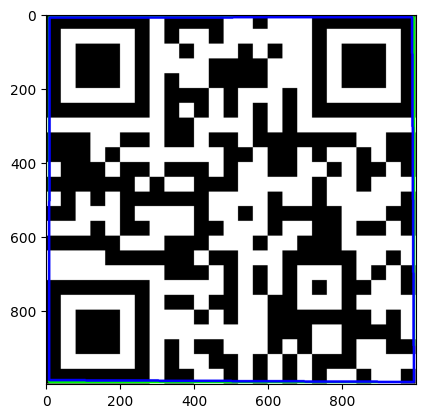

b'https://www.qrcode-monkey.com/'
Rect(left=509, top=554, width=580, height=580)
[Point(x=509, y=1131), Point(x=1089, y=1134), Point(x=1085, y=554), Point(x=510, y=554)]


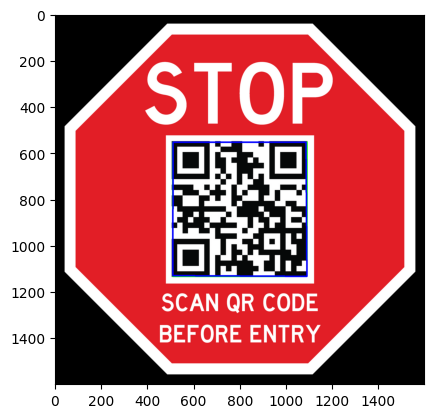

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Spécifier le chemin d'accès vers votre dossier sur Google Drive
input_dir = '/content/drive/My Drive/5.QR_reader_+_attendance_system_with_OpenCV/data'

# Lire les fichiers dans le dossier et décoder les QR codes
for j in sorted(os.listdir(input_dir)): # specify all the images
    img = cv2.imread(os.path.join(input_dir, j))

    qr_info = decode(img)

    for qr in qr_info:

      data = qr.data
      rect = qr.rect
      polygon = qr.polygon

      print(data)  # in order to extract the location of the qr code in the image
      print(rect)
      print(polygon)

      img = cv2.rectangle(img, (rect.left, rect.top), (rect.left + rect.width, rect.top + rect.height), (0, 255, 0), 5)

      img = cv2.polylines(img, [np.array(polygon)], True, (255, 0, 0), 5)

      plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      plt.show()


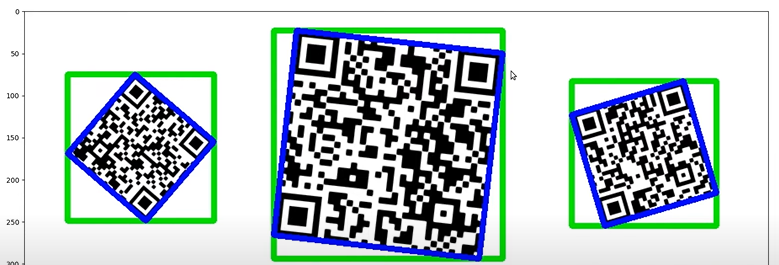